In [22]:
import numpy as np
from collections import defaultdict
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

from dwave.system import DWaveSampler

%matplotlib inline

## Graph Partitioning - a small example

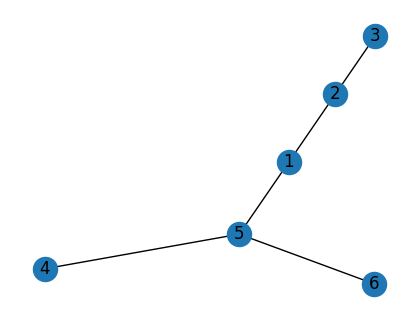

In [18]:
G = nx.Graph()
G.add_edge('1', '2')
G.add_edge('2', '3')
G.add_edge('1', '5')
G.add_edge('5', '6')
G.add_edge('4', '5')
plt.figure(figsize=(4,3))
nx.draw(G, with_labels=True)

In [19]:
## the embedding to chimera 

## insert picture

In [24]:
"""
    Set up parameters
"""

## edges and nodes in the chimera label
nodes_list = [0,1,2,3,4,5]
edges_list = [(0,4),(0,5),(1,5),(2,5),(3,4)]

N = 6
gamma = 1

num_shots = 200

In [26]:
""" 
    Embedding the above small graph example's Hamiltonian into the first chimera unit cell of DW_2000Q_6 machine
"""

## couplings dictionaries
Q = defaultdict(int)

## objective function
for i,j in edges_list:
    Q[(i,j)] += -2
    Q[(i,i)] += 1
    Q[(j,j)] += 1

## quadratic term in the constraint
for i, j in combinations(nodes_list, 2):
    Q[(i,j)] += gamma * 2

## linear terms in the constraint
for node in nodes_list:
    Q[(node, node)] += gamma * (1 - N)
 
print(Q)

defaultdict(<class 'int'>, {(0, 4): 0, (0, 0): -3, (4, 4): -3, (0, 5): 0, (5, 5): -2, (1, 5): 0, (1, 1): -4, (2, 5): 0, (2, 2): -4, (3, 4): 0, (3, 3): -4, (0, 1): 2, (0, 2): 2, (0, 3): 2, (1, 2): 2, (1, 3): 2, (1, 4): 2, (2, 3): 2, (2, 4): 2, (3, 5): 2, (4, 5): 2})


In [ ]:
## calling DW_2000Q_6 machine                       
solver = DWaveSampler(solver='DW_2000Q_6')

## use qubo to solve the problem Q
results = solver.sample_qubo(Q, num_reads=num_shots)

In [ ]:
print(results)